In [1]:
# import libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, auc
from sklearn import metrics

from sklearn import tree
import matplotlib.pyplot as plt

In [3]:
# read the dataset
data = pd.read_csv("clean_hotel_bookings.csv", index_col='Unnamed: 0')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 119389
Data columns (total 58 columns):
hotel                                    119390 non-null int64
is_canceled                              119390 non-null int64
is_repeated_guest                        119390 non-null int64
reserved_room_type                       119390 non-null object
assigned_room_type                       119390 non-null object
country_is_FRA                           119390 non-null int64
country_is_DEU                           119390 non-null int64
country_is_other                         119390 non-null int64
reserved_assigned_room_type_match        119390 non-null int64
fall                                     119390 non-null int64
spring                                   119390 non-null int64
summer                                   119390 non-null int64
winter                                   119390 non-null int64
distribution_channel_Corporate           119390 non-null int64
distr

In [5]:
data['is_canceled'].value_counts(1)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

In [6]:
features = ['hotel',
            'is_repeated_guest',
#             'reserved_room_type',
#             'assigned_room_type',
            'reserved_assigned_room_type_match',
            'country_is_FRA',
            'country_is_DEU',
            'country_is_other',
            'spring',
            'summer',
            'fall',
            'winter',
            'distribution_channel_Corporate',
            'distribution_channel_Direct',
            'distribution_channel_GDS',
            'distribution_channel_TA/TO',
            'distribution_channel_Undefined',
            'market_segment_Aviation',
            'market_segment_Complementary',
            'market_segment_Corporate',
            'market_segment_Direct',
            'market_segment_Groups',
            'market_segment_Offline TA/TO',
            'market_segment_Online TA',
            'market_segment_Undefined',
            'meal_BB',
            'meal_FB',
            'meal_HB',
            'meal_SC',
            'meal_Undefined',
            'deposit_type_No Deposit',
            'deposit_type_Non Refund',
            'customer_type_Contract',
            'customer_type_Group',
            'customer_type_Transient',
            'customer_type_Transient-Party',
            'agent_14',
            'agent_7',
            'agent_is_other',
            'log_lead_minmax',
#             'cut_previous_cancellations',
#             'cut_previous_bookings_not_canceled',
#             'cut_booking_changes',
            'stays_in_weekend_nights_minmax',
            'stays_in_week_nights_minmax',
            'stays_in_total_nights_minmax',
            'adults_minmax',
            'children_minmax',
            'babies_minmax',
            'days_in_waiting_list_minmax',
            'adr_minmax',
            'required_car_parking_spaces_minmax',
            'total_of_special_requests_minmax'
           ]

label = ['is_canceled']

In [7]:
len(features)

48

In [8]:
X = data[features]
Y = data[label]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [57]:
#Import Multinomial Naive Bayes model from sklearn
from sklearn.naive_bayes import MultinomialNB
#Create a Multinomial Bayes Classifier
#mnb = MultinomialNB(alpha=0.1,class_prior=None, fit_prior=False)
mnb = MultinomialNB(alpha=1.0,class_prior=None, fit_prior=True)

In [58]:
model = mnb
model.fit(X_train,y_train.values.ravel())

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [59]:
# import cross validation
from sklearn.model_selection import cross_val_score,cross_val_predict


In [67]:
score = cross_val_score(mnb,X,Y.values.ravel(),cv=3)
score.mean()


0.707898612319617

In [68]:
pred_y = cross_val_predict(mnb,X,Y.values.ravel(),cv=3)
pred_y


array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [69]:
pred_proba = cross_val_predict(mnb,X,Y.values.ravel(),cv=3, method = 'predict_proba')
pred_proba

array([[0.94880517, 0.05119483],
       [0.94734599, 0.05265401],
       [0.96105462, 0.03894538],
       ...,
       [0.77955109, 0.22044891],
       [0.44203177, 0.55796823],
       [0.73072409, 0.26927591]])

In [79]:
#print("Confusion Matrix:", "\n", confusion_matrix(Y, pred_y))
#print("Classification Report:","\n", classification_report(Y, pred_y))
print("Confusion Matrix:", "\n"+str(confusion_matrix(Y,pred_y))+"\n")
print("Accuracy Score:", "\n"+str(accuracy_score(Y,pred_y,normalize=True, sample_weight=None))+"\n")
print(classification_report(Y,pred_y))


Confusion Matrix: 
[[65701  9465]
 [25409 18815]]

Accuracy Score: 
0.7078984839601307

              precision    recall  f1-score   support

           0       0.72      0.87      0.79     75166
           1       0.67      0.43      0.52     44224

    accuracy                           0.71    119390
   macro avg       0.69      0.65      0.65    119390
weighted avg       0.70      0.71      0.69    119390



Text(0.5, 0, 'False Positive Rate')

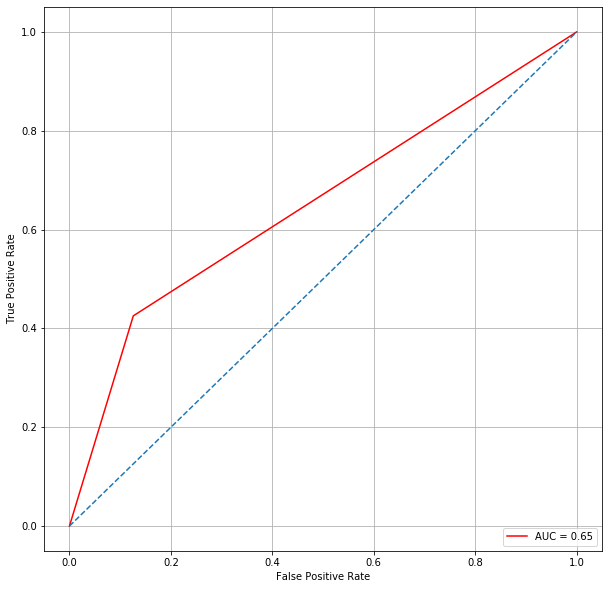

In [80]:
fpr, tpr, thresholds = metrics.roc_curve(Y,pred_y,pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (10,10))
plt.plot(fpr, tpr, color = 'red', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.grid(True)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [81]:
metrics.auc(fpr, tpr)

0.6497632132462398

In [76]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


In [ ]:
fpr, tpr, thresholds = roc_curve(y, y_pred_prob[:,1], pos_label=1)

In [70]:
#Import Gaussian Naive Bayes model from sklearn
from sklearn.naive_bayes import GaussianNB


In [74]:
#Create a Gaussian Naive Bayes Classifier
gnb = GaussianNB() 
score = cross_val_score(gnb,X,Y.values.ravel(),cv=10)
score.mean()


0.6721323731068323